####Imporiting the libraries

In [2]:
import pandas as pd 
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing

Using TensorFlow backend.


In [3]:
pwd

'/Users/ankitkothari/Documents/ensembel'

In [4]:
data = pd.read_csv('/Users/ankitkothari/Documents/ensembel/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data_class = data.groupby(['Class']).agg(
  {
    'Time':{'Mean': np.mean, 'Max': max, 'Min': min, 'Count': 'count'},
    'Amount':{'Mean': np.mean, 'Max': max, 'Min': min, 'Count': 'count'}

  })
data_class

Time                               Amount                 \
               Mean       Max    Min   Count        Mean       Max  Min   
Class                                                                     
0      94838.202258  172792.0    0.0  284315   88.291022  25691.16  0.0   
1      80746.806911  170348.0  406.0     492  122.211321   2125.87  0.0   

               
        Count  
Class          
0      284315  
1         492

In [8]:
zero_amount = data[data['Amount']==0].groupby(['Class']).agg(
  {
    'Time':{'Mean': np.mean, 'Max': max, 'Min': min, 'Count': 'count'},
  })
zero_amount['Time']['Count']

Class
0    1798
1      27
Name: Count, dtype: int64

In [9]:
zero_amount['Time']['Count'].sum()

1825

In [10]:
zero_amount_fraud = (zero_amount['Time']['Count'][1]/zero_amount['Time']['Count'].sum())*100
zero_amount_fraud

1.4794520547945205

In [11]:
non_zero_fraud = (data_class['Time']['Count'][1]/data_class['Time']['Count'].sum())*100
non_zero_fraud 

0.1727485630620034

In [12]:
data.columns
factors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [13]:
factors_class = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Class']
data_factors_class = data[factors_class].apply(lambda x: round(x,2))
data_factors_class.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05,284807.000000,284807.000000
mean,0.000008,-0.000002,-0.000005,-0.000002,0.000001,-0.000001,0.000002,-0.000008,0.000003,-0.000003,...,0.000008,0.000003,0.000005,-0.000003,0.000004,-0.000002,0.000002,-8.075644e-07,-0.000002,0.001727
std,1.958696,1.651319,1.516255,1.415872,1.380260,1.332266,1.237097,1.194356,1.098622,1.088851,...,0.770932,0.734524,0.725713,0.624475,0.605654,0.521295,0.482235,4.036492e-01,0.330105,0.041527
min,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,...,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-2.257000e+01,-15.430000,0.000000
25%,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,...,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-7.000000e-02,-0.050000,0.000000
50%,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,...,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,-0.000000e+00,0.010000,0.000000
75%,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,...,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,9.000000e-02,0.080000,0.000000
max,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,...,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,3.161000e+01,33.850000,1.000000


In [14]:
#### VISUALLY CHECKING IF THERE IS A SIGNIFICANT DIFFERENCE IN DISTRIBUTION FOR DIFFERENT FEATURES BETWEEN FRAUD AND NORMAL TRANSACTIONS

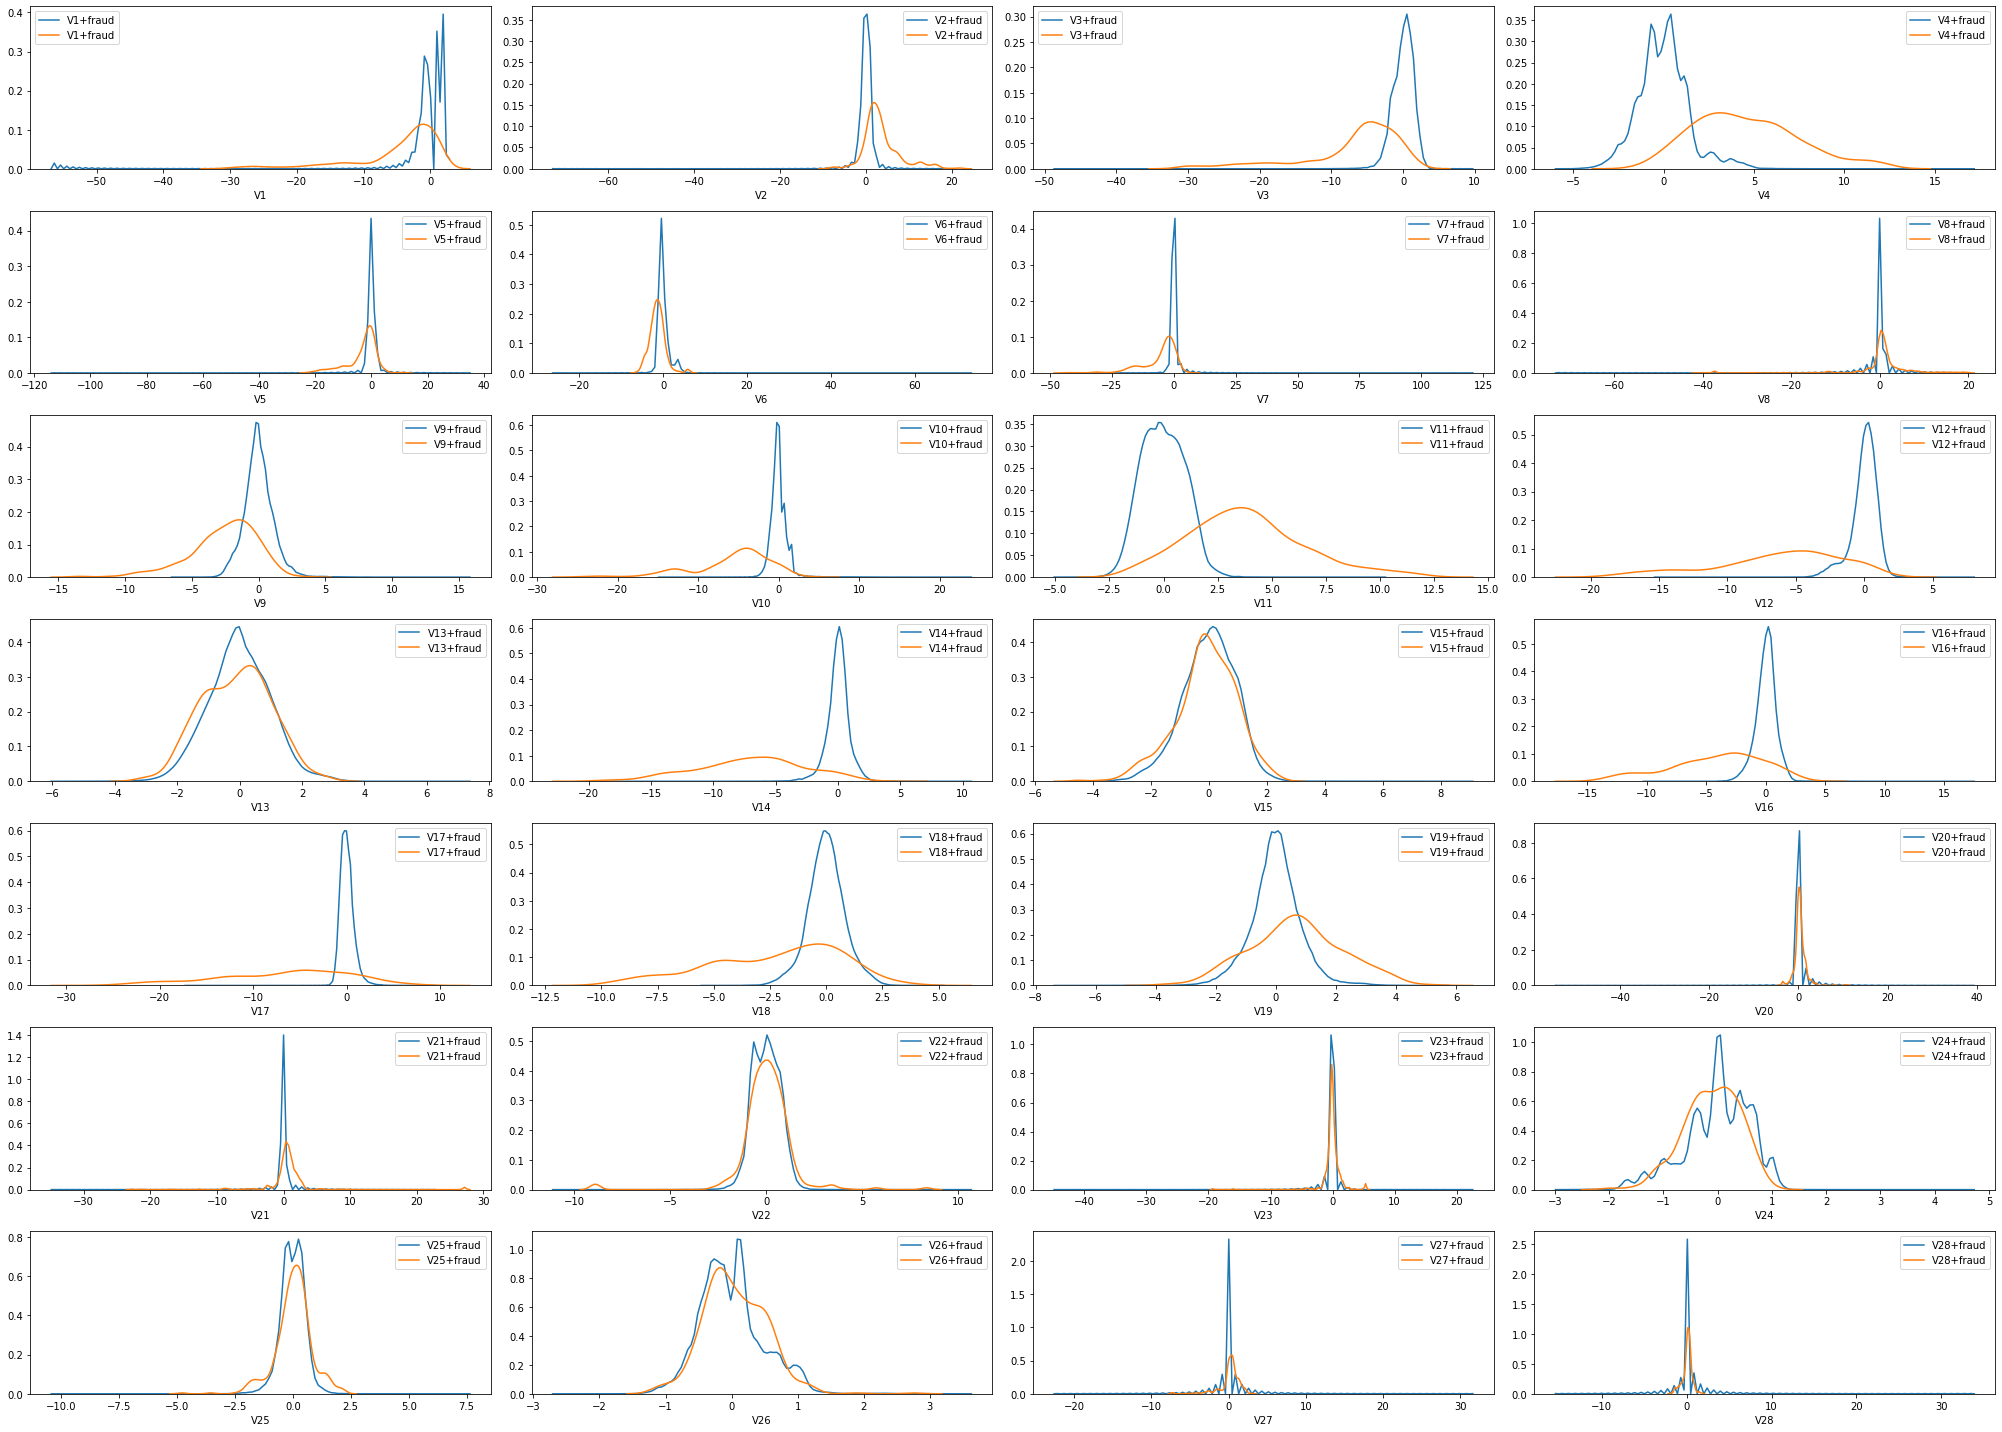

In [15]:
fig = plt.figure(figsize=[28,20])
for i,factor in enumerate(factors):
    ax = fig.add_subplot(7,4,i+1)
    sns.distplot(data_factors_class[data_factors_class['Class']==0][factor], label="{}+fraud".format(factor), vertical=False, ax=ax, kde=True, hist=False)
    sns.distplot(data_factors_class[data_factors_class['Class']==1][factor], label="{}+fraud".format(factor), vertical=False, ax=ax, kde=True, hist=False)
plt.tight_layout()
plt.show()

In [16]:
len(data_factors_class.loc[:,['V28', 'Class']])


284807

In [17]:
#### CHECKING IF THERE IS A STATICALLY SIGNIFICANT DIFFERENCE IN DISTRIBUTION

In [18]:
def calculate_ttest(column):
           sample_frame = data_factors_class.loc[:,[column, 'Class']]
           data_A = sample_frame[(sample_frame['Class']==0)]
           data_B = sample_frame[(sample_frame['Class']==1)]
           ttest,pval = stats.ttest_ind(data_A[column], data_B[column],equal_var=False)
           pval=round((pval),4)
           print(f'p-value for column {column} is {pval}')
           if pval<0.050:
              return "Diff mean"
           else:
              return  "Same Mean"

In [19]:
calculate_ttest('V28')

p-value for column V28 is 0.0022


'Diff mean'

In [1]:
non_statistically_similar=[i for i in factors if calculate_ttest(i)=='Diff mean']
non_statistically_similar

NameError: name 'factors' is not defined

In [21]:
#### TESTING WHICH COLUMNS HAVE DIFFERENT DISTRIBUTION FOR FRADUD AND NORMAL TRANSACTIONS

In [22]:
non_statistically_similar.append('Class')

In [23]:
### FILTERING THE DATA WITH THE COLUMS WHOSE DISTRIBUTION IS DIFFERENT BETWEEEN THE FRAUD AND NORMAL CLASS

In [24]:
data_ff_1 = data[non_statistically_similar]
data_ff_1.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V17,V18,V19,V20,V21,V24,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.502292,0.219422,0.215153,0


In [25]:
#### EXPLORING FEATURES AND LOGISTIC REGRESSION

In [26]:
X= data[non_statistically_similar].drop('Class',axis=1)
y= data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [27]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
#pred_probs = lr.predict_proba(X_train)
#pred_probs
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

[[93824    14]
 [   56    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.73       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987



In [28]:
#### THIS FIRST LOGISTIC REGRESSION MODEL COULD PREDICT ONLY 62% CORRECT FRAUD TRANSACTION 

In [29]:
#### STEP1: FILTRING THE FEATURES TO IMPROVE MODEL1

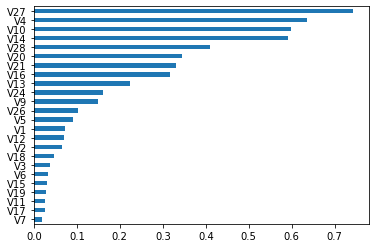

In [30]:
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0],
                            index=X.columns, )

feature_importance_ordered = feature_importance.abs().sort_values()
feature_importance_ordered.plot.barh()
plt.show()

In [31]:
#### LETS TRAIN ON THE TOP 8 FEATURES FOR THE EFFICIENCY OF THE MODEL

In [32]:
##converted the trimmed features into dataframe
feature_importance=feature_importance.to_frame()
feature_importance.columns=['value']
trim_features = feature_importance['value'].abs().sort_values(ascending=False).index[0:10]
trim_features


Index(['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24'], dtype='object')

In [33]:
X1= data[trim_features]
y1= data['Class']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

lr1 = LogisticRegression()
lr1.fit(X1_train,y1_train)
predictions1 = lr1.predict(X1_test)
#pred_probs = lr.predict_proba(X_train)
#pred_probs
print(metrics.confusion_matrix(y1_test,predictions))
print(metrics.classification_report(y1_test,predictions1))


[[93824    14]
 [   56    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.72       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987



In [34]:
####Colinearity Matrix: Collinearity occurs where more than one feature contains data that are similar.
####The effect of collinearity is that your model will overfit - 
####you may get great results on your test data set, 
####but then the model performs worse on unseen data (like the holdout set).

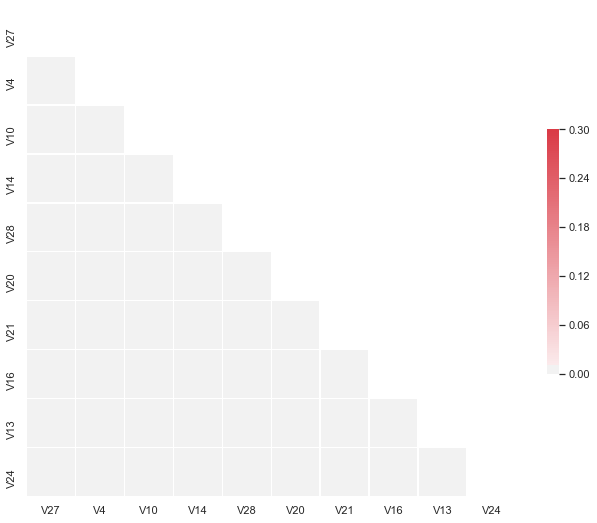

In [35]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['V27', 'V4', 'V10', 'V14', 'V28', 'V20', 'V21', 'V16', 'V13', 'V24']
plot_correlation_heatmap(X1)

In [36]:
#### Introducing RFECV to find the most optimized features

In [37]:
lr3 = LogisticRegression(C=100)
selector = RFECV(lr3,cv=3, scoring='recall')
selector.fit(X_train,y_train)
print(selector.support_)
optimized_columns_recall = X_train.columns[selector.support_]
X_recall= data[optimized_columns_recall]
y_recall= data['Class']
XR_train, XR_test, yR_train, yR_test = train_test_split(X_recall, y_recall, test_size=0.33, random_state=42)
lr3.fit(XR_train, yR_train)
print("Recall:",optimized_columns_recall)
predictions3 = lr3.predict(XR_test)
print(metrics.classification_report(yR_test,predictions3))



[ True  True  True  True  True  True False  True  True  True False  True
  True False  True  True  True  True  True  True  True  True  True  True]
Recall: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V9', 'V10', 'V11', 'V13', 'V14',
       'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24', 'V26', 'V27', 'V28'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.73       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987



In [38]:
lr4 = LogisticRegression()
selector1 = RFECV(lr4,cv=3, scoring='accuracy')
selector1.fit(X_train,y_train)
print(selector1.support_)
optimized_columns_Accuracy = X_train.columns[selector1.support_]
X_Accuracy= data[optimized_columns_Accuracy]
y_Accuracy= data['Class']
XR_train, XR_test, yR_train, yR_test = train_test_split(X_Accuracy, y_Accuracy, test_size=0.33, random_state=42)
lr4.fit(XR_train, yR_train)
print("Accuracy:",optimized_columns_Accuracy)
predictions4 = lr4.predict(XR_test)
print(metrics.classification_report(yR_test,predictions4))

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
Accuracy: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24', 'V26',
       'V27', 'V28'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.73       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987



In [39]:
lr5 = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
hyperparameters = dict(C=C, penalty=penalty)
randomizedsearch = RandomizedSearchCV(lr5, hyperparameters, random_state=1, n_iter=100, cv=3, verbose=1)
best_model = randomizedsearch.fit(XR_train, yR_train)
predictions5 = best_model.predict(XR_test)
print(metrics.classification_report(yR_test,predictions5))
print("The mean accuracy of the model is:",best_model.score(XR_train, yR_train))
 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.5min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.73       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987

The mean accuracy of the model is: 0.9991300702232471


In [40]:
lr6 = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
hyperparameters = dict(C=C, penalty=penalty)
gridsearch = GridSearchCV(lr6, hyperparameters, cv=3, verbose=1)
best_model_gs = gridsearch.fit(XR_train, yR_train)
predictions6 = best_model_gs.predict(XR_test)
print(metrics.classification_report(yR_test,predictions6))
print("The mean accuracy of the model is:",best_model_gs.score(XR_train, yR_train))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.1min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.73       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987

The mean accuracy of the model is: 0.9991300702232471


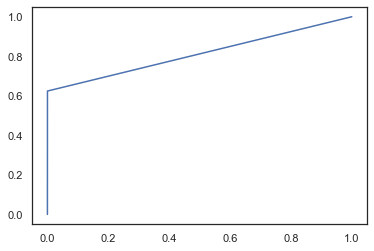

In [41]:
fpr6, tpr6, _ = (metrics.roc_curve(yR_test,predictions6))
plt.plot(fpr6, tpr6)
plt.show()

In [42]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X_recall, y_recall)
X_resampled, y_resampled = rus.fit_resample(X_recall, y_recall)
print(len(y_resampled))
print(len(X_resampled))


984
984


In [43]:
def sampling_graph(y_sampling, sampling_type):
    datafra = pd.DataFrame(data=y_sampling, index=range(len(y_sampling)), columns=['Class'])
    datafra.Class.value_counts().index
    ax = plt.figure()
    ax = sns.barplot(x=datafra.Class.value_counts().index, y=datafra.Class.value_counts(), data=datafra)
    plt.title(sampling_type)
    return ax



In [44]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
    return

In [45]:
def logist_regression(X_sampling, y_sampling, sampling_type,XR_test, yR_test):
   
   #### logistic regression part and grid search 
   lr7 = LogisticRegression()
   penalty = ['l1', 'l2']
   C = [0.001,0.01,0.1,1,10,100]
   hyperparameters = dict(C=C, penalty=penalty)
   gridsearch = GridSearchCV(lr7, hyperparameters, cv=3, verbose=1)
   best_model_gs = gridsearch.fit(X_sampling, y_sampling)
   predictions7 = best_model_gs.predict(XR_test)

   #### printing the right metrics
   print(metrics.classification_report(yR_test,predictions7))
   print(metrics.confusion_matrix(yR_test,predictions7))
    
    
   #### plotting the sampling distribution
   datafra = pd.DataFrame(data=y_sampling, index=range(len(y_sampling)), columns=['Class'])
   datafra.Class.value_counts().index 
   #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False,figsize=[12,12])
   fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[12,4])
   sns.barplot(x=datafra.Class.value_counts().index, y=datafra.Class.value_counts(), data=datafra, ax = ax1)
   
   ####plotting the heatmap for confusion matrix
   metric = metrics.confusion_matrix(yR_test,predictions7)
   confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
   confusion_dataframe
   sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)
   
    
   #### plotting the ROC and AUC curve
   fpr, tpr, _ = (metrics.roc_curve(yR_test,predictions7))
   ax3.plot(fpr, tpr)
   roc_auc = auc(fpr, tpr)
   ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
   ax3.legend(loc='lower right')
   ax3.plot([0,1],[0,1],'r--')
   ax3.set_xlim([-0.1,1.0])
   ax3.set_ylim([-0.1,1.01])
   ax3.set_ylabel('True Positive Rate')
   ax3.set_xlabel('False Positive Rate')
   plt.tight_layout()
   plt.show()
   print(f'Area Under the Curve: {round(roc_auc,2)}')
    

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   44.0s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.73       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987

[[93824    14]
 [   56    93]]


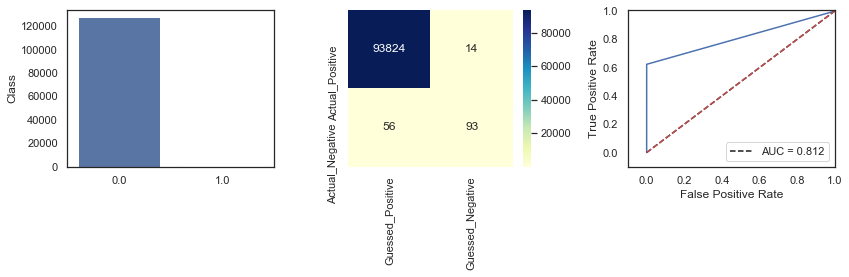

Area Under the Curve: 0.81


In [46]:
logist_regression(XR_train, yR_train, "Normal_Sampling",XR_test, yR_test)

In [47]:
logist_regression(X_resampled, y_resampled, "Under_Sampling",XR_test, yR_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished


ValueError: X has 23 features per sample; expecting 21

In [236]:
lr7 = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
hyperparameters = dict(C=C, penalty=penalty)
gridsearch = GridSearchCV(lr7, hyperparameters, cv=3, verbose=1)
best_model_gs = gridsearch.fit(X_resampled, y_resampled)
predictions7 = best_model_gs.predict(XR_test)
print(metrics.classification_report(yR_test,predictions7))
print(metrics.confusion_matrix(yR_test,predictions7))
fpr, tpr, _ = (metrics.roc_curve(yR_test,predictions7))
roc_auc = auc(fpr, tpr)
roc_auc

Fitting 3 folds for each of 12 candidates, totalling 36 fits
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93838
           1       0.07      0.91      0.13       149

    accuracy                           0.98     93987
   macro avg       0.54      0.95      0.56     93987
weighted avg       1.00      0.98      0.99     93987



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


[[92060  1778]
 [   13   136]]


0.9469020649753229

In [243]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [241]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_recall)
print(len(X_pca))
print(len(y_recall))

284807
284807


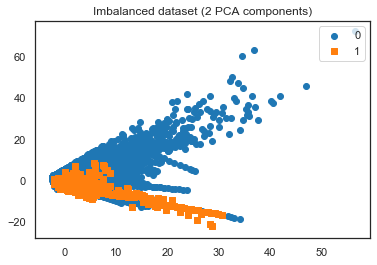

In [244]:
plot_2d_space(X_pca, y_recall, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [     0      1      2 ... 190817 190818 190819]


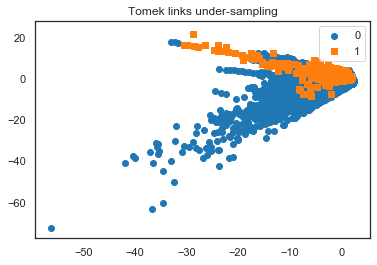

In [257]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(XR_train, yR_train)
print('Removed indexes:', id_tl)
plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [283]:
len(y_tl)
new_series = pd.Series(y_tl)
new_series.value_counts()

0    190455
1       343
dtype: int64

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   25.6s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.62      0.73       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987

[[93824    14]
 [   56    93]]


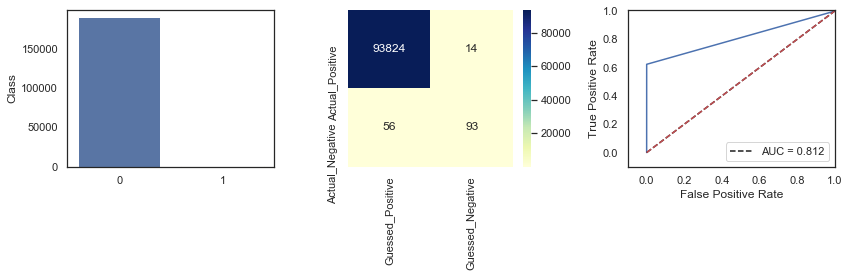

Area Under the Curve: 0.81


In [258]:
logist_regression(X_tl, y_tl, "TomekLinks",XR_test, yR_test)

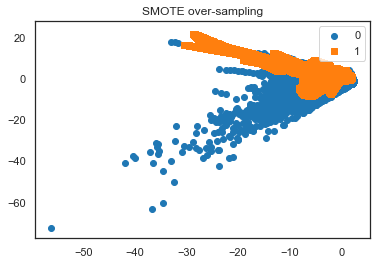

In [264]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(XR_train, yR_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [282]:
len(y_sm)
new_series = pd.Series(y_sm)
new_series.value_counts()

1    190477
0    190477
dtype: int64

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   30.9s finished


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     93838
           1       0.05      0.91      0.10       149

    accuracy                           0.97     93987
   macro avg       0.53      0.94      0.54     93987
weighted avg       1.00      0.97      0.99     93987

[[91427  2411]
 [   13   136]]


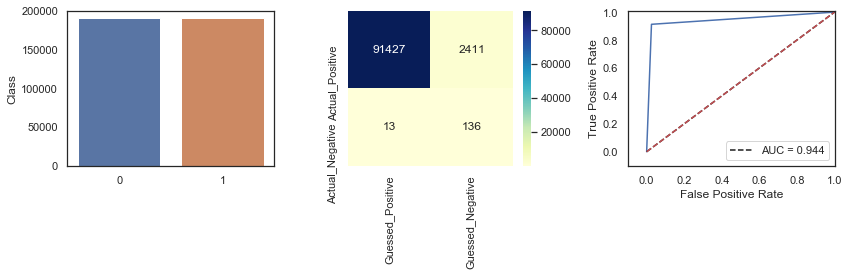

Area Under the Curve: 0.94


In [265]:
logist_regression(X_sm, y_sm, "SMOTE over-sampling",XR_test, yR_test)

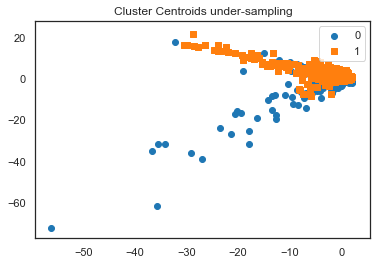

In [272]:
cc = ClusterCentroids(ratio={0: 400})
X_cc, y_cc = cc.fit_sample(XR_train, yR_train)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

In [291]:
len(y_cc)
len(yR_train)
new_series = pd.Series(y_cc)
old_series = pd.Series(yR_train)
new_series.value_counts()
print(len(yR_train))
print(len(y_cc))
print(new_series.value_counts())
print(old_series.value_counts())

190820
743
0    400
1    343
dtype: int64
0    190477
1       343
Name: Class, dtype: int64


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93838
           1       0.08      0.91      0.15       149

    accuracy                           0.98     93987
   macro avg       0.54      0.95      0.57     93987
weighted avg       1.00      0.98      0.99     93987

[[92362  1476]
 [   14   135]]


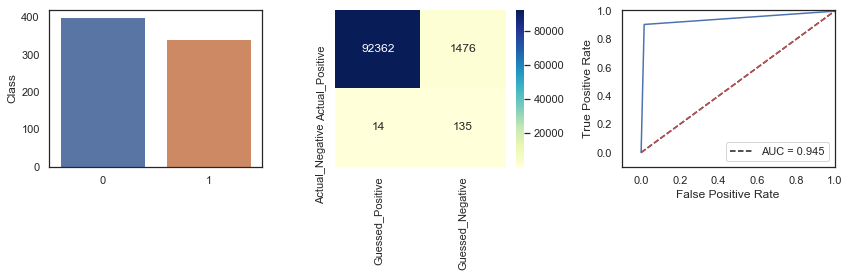

Area Under the Curve: 0.95


In [285]:
logist_regression(X_cc, y_cc, "SMOTE over-sampling",XR_test, yR_test)

In [295]:
lr7 = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
hyperparameters = dict(C=C, penalty=penalty)
gridsearch = GridSearchCV(lr7, hyperparameters, cv=3, verbose=1)
best_model_gs = gridsearch.fit(X_resampled, y_resampled)
predictions7 = best_model_gs.predict(XR_test)
print(metrics.classification_report(yR_test,predictions7))
print(metrics.confusion_matrix(yR_test,predictions7))
fpr, tpr, _ = (metrics.roc_curve(yR_test,predictions7))
roc_auc = auc(fpr, tpr)
roc_auc

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93838
           1       0.07      0.91      0.13       149

    accuracy                           0.98     93987
   macro avg       0.54      0.95      0.56     93987
weighted avg       1.00      0.98      0.99     93987

[[92059  1779]
 [   13   136]]


0.9468967366435171

In [48]:
##### SCALING THE DATA 

X= data[non_statistically_similar].drop('Class',axis=1)
X = X.loc[:,:].apply(lambda x: round(x,2))
mm_scaler = preprocessing.MinMaxScaler()
X.columns
X[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24',
       'V26', 'V27', 'V28']] = mm_scaler.fit_transform(X[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V24',
       'V26', 'V27', 'V28']])

X


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V16,V17,V18,V19,V20,V21,V24,V26,V27,V28
0,0.935270,0.766512,0.881476,0.312943,0.763431,0.267645,0.266829,0.475190,0.510550,0.252675,...,0.434340,0.737286,0.655433,0.594531,0.582943,0.561180,0.392183,0.393791,0.418974,0.312703
1,0.978593,0.770099,0.840409,0.271720,0.766124,0.262216,0.264880,0.453825,0.505172,0.381094,...,0.463911,0.727986,0.640990,0.551562,0.579536,0.557795,0.336927,0.446078,0.416390,0.313312
2,0.935270,0.753112,0.868134,0.268617,0.762354,0.281118,0.270180,0.410751,0.513033,0.322235,...,0.357393,0.763441,0.645117,0.386719,0.585818,0.565533,0.289757,0.401961,0.415467,0.311891
3,0.941896,0.765246,0.868480,0.213652,0.765652,0.275588,0.266829,0.414886,0.507654,0.271700,...,0.415580,0.711421,0.788858,0.467187,0.578045,0.559729,0.223720,0.388889,0.417682,0.314326
4,0.938668,0.776535,0.864322,0.269504,0.762959,0.264026,0.268961,0.491041,0.524204,0.236623,...,0.434976,0.724208,0.650619,0.625781,0.584647,0.561341,0.401617,0.506536,0.420635,0.317573
5,0.951070,0.777379,0.857217,0.244238,0.768547,0.262719,0.268291,0.443143,0.501034,0.365042,...,0.462003,0.729439,0.658184,0.560937,0.581133,0.558117,0.332884,0.442810,0.421189,0.314732
6,0.979273,0.768728,0.838330,0.304965,0.766999,0.265735,0.265306,0.478635,0.506620,0.200951,...,0.435294,0.731183,0.611417,0.559375,0.577939,0.558762,0.277628,0.382353,0.417128,0.313312
7,0.947503,0.782233,0.856004,0.230053,0.772115,0.267344,0.272190,0.484149,0.534547,0.248514,...,0.446741,0.695728,0.628611,0.588281,0.578578,0.592778,0.295148,0.416667,0.394241,0.290990
8,0.943255,0.770310,0.835557,0.239805,0.783695,0.300422,0.267621,0.449345,0.500207,0.243163,...,0.442607,0.716652,0.661623,0.607812,0.580813,0.560374,0.518868,0.362745,0.416759,0.315950
9,0.952599,0.779067,0.855484,0.242021,0.769086,0.260507,0.269327,0.437285,0.501034,0.346017,...,0.472814,0.715490,0.686382,0.598437,0.582411,0.557472,0.330189,0.439542,0.421189,0.314732


In [49]:
### splitting the data again

XN_train, XN_test, yN_train, yN_test = train_test_split(X, y1, test_size=0.33, random_state=42)


984
984
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.9s finished


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     93838
           1       0.05      0.91      0.09       149

    accuracy                           0.97     93987
   macro avg       0.52      0.94      0.54     93987
weighted avg       1.00      0.97      0.98     93987

[[91205  2633]
 [   14   135]]


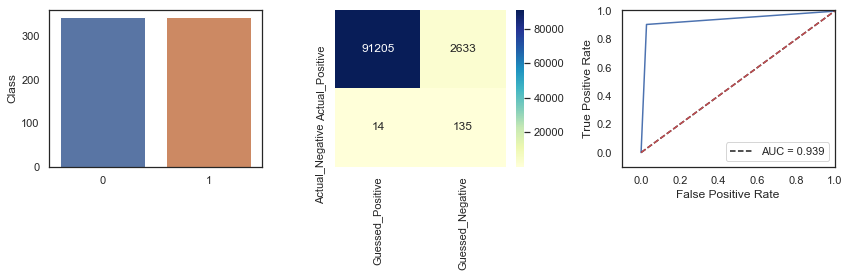

Area Under the Curve: 0.94


In [50]:
rus = RandomUnderSampler(random_state=0)
rus.fit(XN_train, yN_train)
X_smn, y_smn = rus.fit_resample(XN_train, yN_train)
print(len(y_resampled))
print(len(X_resampled))

logist_regression(X_smn, y_smn, "SMOTE over-sampling",XN_test, yN_test)

In [ ]:
#### DIMENSIONALITY REDUCTION THROUGH PCA

In [ ]:
#### DRAWING REGRESSION BOUNDARIES